### Machine learning random forest model

In [47]:
import pandas as pd
import os
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [48]:
feature_data = pd.read_csv('/home/guoy20/Data/feature_data.csv')

In [57]:
X = feature_data[list(feature_data.columns[2:])]
y = feature_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [59]:
y_pred = xg_reg.predict(X_test)

In [60]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.50      0.33      0.40         9
           2       0.31      0.56      0.40         9

    accuracy                           0.54        39
   macro avg       0.53      0.50      0.49        39
weighted avg       0.60      0.54      0.55        39



<Figure size 720x720 with 0 Axes>

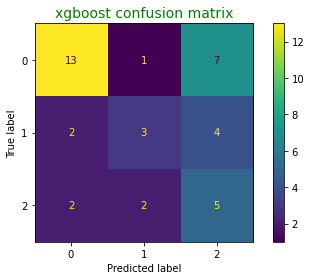

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
xgboost_ypre = xg_reg.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, xgboost_ypre)
plt.title(f'xgboost confusion matrix', size=14, c='green')
plt.tight_layout() 
plt.show()

In [62]:
list(feature_data.columns[1:])

['resume_name',
 'sales_count',
 'financial_count',
 'investment_count',
 'advisor_count',
 'joy',
 'anger',
 'fear',
 'number_count',
 'awards',
 'certificates',
 'contact/name/title',
 'education',
 'interests',
 'languages',
 'para',
 'professional_experiences',
 'projects',
 'skills',
 'soft_skills',
 'summary',
 'readability']

In [63]:
importance = xg_reg.feature_importances_
result = []

for i, v in enumerate(importance):
    result.append((X.columns[i], v))
result.sort(key = lambda x:x[1],reverse = True)
result

[('readability', 0.16636737),
 ('joy', 0.08633109),
 ('sales_count', 0.06579423),
 ('projects', 0.06411653),
 ('professional_experiences', 0.059652533),
 ('advisor_count', 0.055260807),
 ('contact/name/title', 0.053745758),
 ('investment_count', 0.04673383),
 ('soft_skills', 0.046632517),
 ('certificates', 0.045075793),
 ('anger', 0.038616642),
 ('fear', 0.037392315),
 ('para', 0.035716675),
 ('financial_count', 0.0327017),
 ('interests', 0.032389086),
 ('number_count', 0.031736266),
 ('skills', 0.028837731),
 ('education', 0.02800618),
 ('summary', 0.025829822),
 ('awards', 0.01906309),
 ('languages', 0.0)]

In [64]:
cor = feature_data.corr()

<AxesSubplot:>

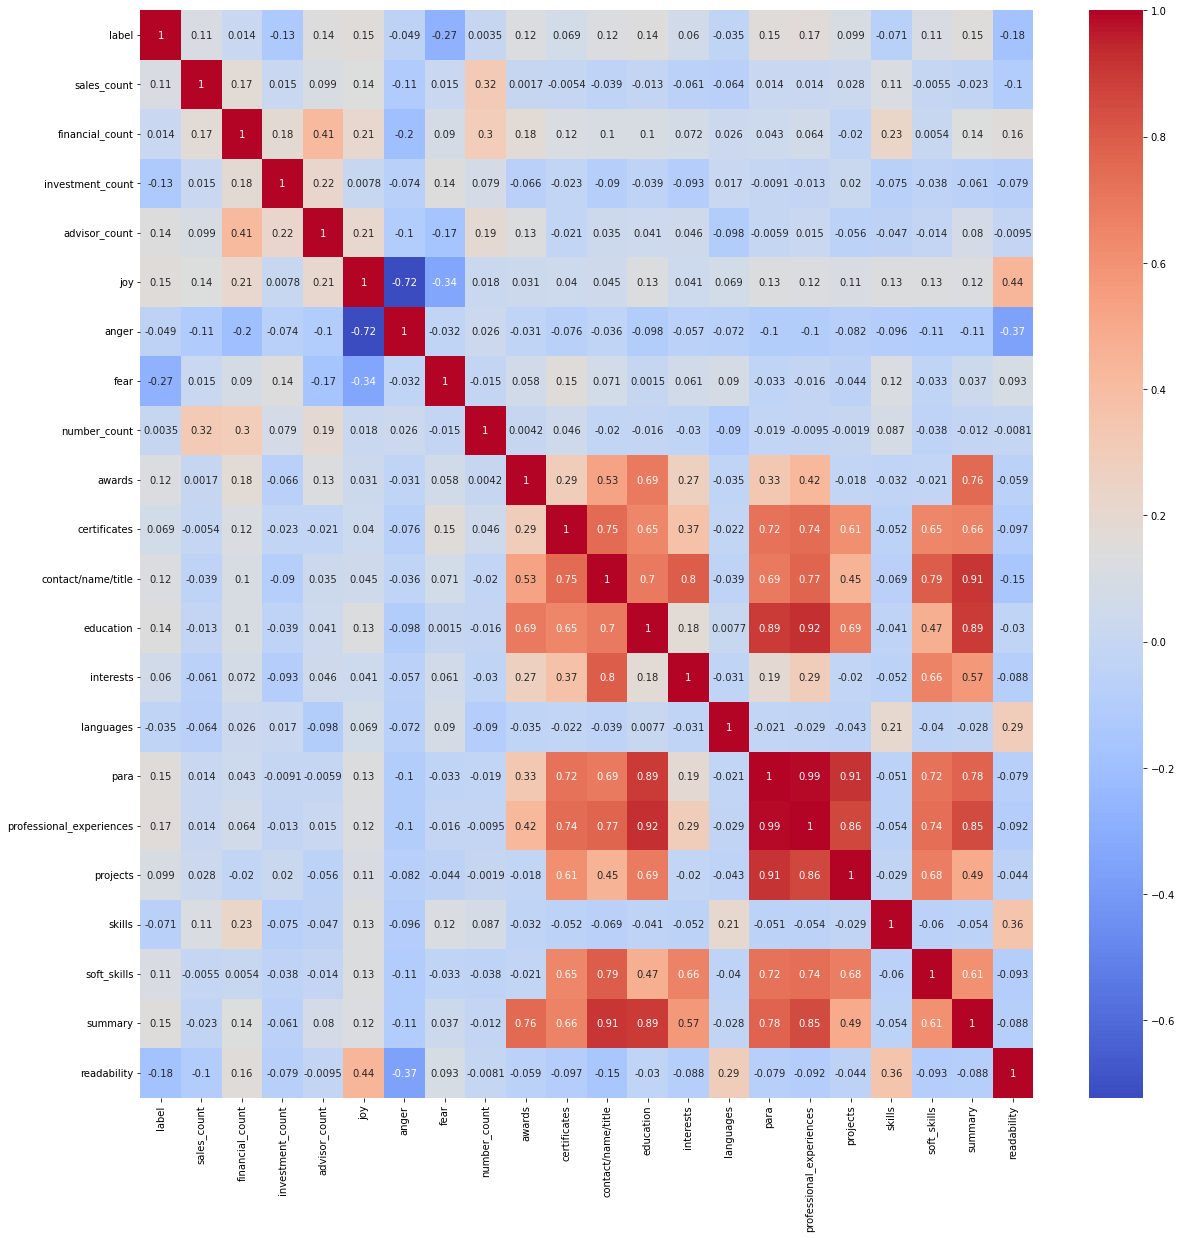

In [65]:
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True, cmap='coolwarm')

In [66]:
feature_data

,label,resume_name,sales_count,financial_count,investment_count,advisor_count,joy,anger,fear,number_count,...,education,interests,languages,para,professional_experiences,projects,skills,soft_skills,summary,readability
0,0,"138. Vergari, Christine_Resume.json",22,2,0,4,0.694915,0.000000,0.305085,7,...,0.050847,0.033898,0.016949,0.000000,0.118644,0.0,0.135593,0.000000,0.423729,48.409532
1,0,"07. Arnold, Stephen_Resume.json",0,2,0,1,0.433333,0.433333,0.133333,0,...,0.166667,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.066667,0.133333,48.279288
2,2,"20. Birren, Nick_Resume.json",9,0,0,0,0.760000,0.160000,0.080000,136,...,0.080000,0.040000,0.040000,0.080000,0.240000,0.0,0.080000,0.040000,0.160000,46.625553
3,2,"83. Lopes, Michael_Resume.json",26,6,2,0,0.702703,0.162162,0.135135,21,...,0.081081,0.027027,0.000000,0.054054,0.108108,0.0,0.135135,0.027027,0.216216,45.469264
4,1,"58. Jacobs, Audrey_Resume.json",0,0,4,0,0.809524,0.047619,0.095238,44,...,0.190476,0.047619,0.000000,0.238095,0.095238,0.0,0.000000,0.000000,0.190476,50.439669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,"91. Michie, Kirk_Resume_06.22.14.json",21,1,4,9,0.611111,0.148148,0.222222,96,...,0.074074,0.037037,0.000000,0.092593,0.166667,0.0,0.000000,0.000000,0.333333,47.880946
126,1,"79. Lenahan, John_CFP.json",8,10,11,16,0.459016,0.467213,0.057377,776,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
127,2,"137. Ventura, Nicholas_Resume_1_2019.json",2,3,4,0,0.678571,0.142857,0.178571,51,...,0.071429,0.107143,0.000000,0.000000,0.214286,0.0,0.035714,0.000000,0.321429,40.376452
128,0,"33. Danklef, Julia_Background.json",0,5,1,6,0.185185,0.388889,0.259259,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [67]:
new_data = feature_data.drop(feature_data[(feature_data['label'] == 1)].index)

In [68]:
new_data.loc[new_data['label']==2, 'label'] = 1

In [69]:
new_data

,label,resume_name,sales_count,financial_count,investment_count,advisor_count,joy,anger,fear,number_count,...,education,interests,languages,para,professional_experiences,projects,skills,soft_skills,summary,readability
0,0,"138. Vergari, Christine_Resume.json",22,2,0,4,0.694915,0.000000,0.305085,7,...,0.050847,0.033898,0.016949,0.000000,0.118644,0.000000,0.135593,0.000000,0.423729,48.409532
1,0,"07. Arnold, Stephen_Resume.json",0,2,0,1,0.433333,0.433333,0.133333,0,...,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.066667,0.133333,48.279288
2,1,"20. Birren, Nick_Resume.json",9,0,0,0,0.760000,0.160000,0.080000,136,...,0.080000,0.040000,0.040000,0.080000,0.240000,0.000000,0.080000,0.040000,0.160000,46.625553
3,1,"83. Lopes, Michael_Resume.json",26,6,2,0,0.702703,0.162162,0.135135,21,...,0.081081,0.027027,0.000000,0.054054,0.108108,0.000000,0.135135,0.027027,0.216216,45.469264
5,0,Raynor (Love).Zachary.Resume.json,0,0,8,1,0.391304,0.260870,0.217391,17,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,"119. Ruggiero, Joseph_Resume.json",10,6,2,5,0.543478,0.086957,0.369565,52,...,0.130435,0.021739,0.000000,0.065217,0.086957,0.021739,0.000000,0.000000,0.413043,48.624040
125,0,"91. Michie, Kirk_Resume_06.22.14.json",21,1,4,9,0.611111,0.148148,0.222222,96,...,0.074074,0.037037,0.000000,0.092593,0.166667,0.000000,0.000000,0.000000,0.333333,47.880946
127,1,"137. Ventura, Nicholas_Resume_1_2019.json",2,3,4,0,0.678571,0.142857,0.178571,51,...,0.071429,0.107143,0.000000,0.000000,0.214286,0.000000,0.035714,0.000000,0.321429,40.376452
128,0,"33. Danklef, Julia_Background.json",0,5,1,6,0.185185,0.388889,0.259259,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
X = new_data[list(new_data.columns[2:])]
y = new_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
y_pred = xg_reg.predict(X_test)

In [73]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.67      0.55      0.60        11

    accuracy                           0.75        32
   macro avg       0.72      0.70      0.71        32
weighted avg       0.74      0.75      0.74        32



<Figure size 720x720 with 0 Axes>

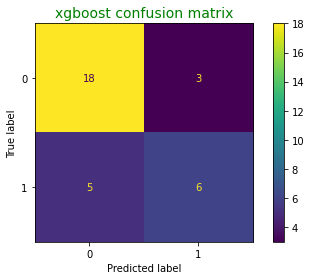

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
xgboost_ypre = xg_reg.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, xgboost_ypre)
plt.title(f'xgboost confusion matrix', size=14, c='green')
plt.tight_layout() 
plt.show()

In [78]:
importance = xg_reg.feature_importances_

result = []

for i, v in enumerate(importance):
    result.append((X.columns[i], v))
result.sort(key = lambda x:x[1],reverse = True)
result

[('readability', 0.21273561),
 ('para', 0.11289211),
 ('interests', 0.083018854),
 ('professional_experiences', 0.079640806),
 ('joy', 0.06995536),
 ('certificates', 0.058635984),
 ('anger', 0.054115877),
 ('advisor_count', 0.052941196),
 ('awards', 0.051254433),
 ('investment_count', 0.042008173),
 ('fear', 0.040634137),
 ('financial_count', 0.0318619),
 ('skills', 0.031000707),
 ('number_count', 0.02861696),
 ('sales_count', 0.02497816),
 ('summary', 0.01418046),
 ('education', 0.011529235),
 ('contact/name/title', 0.0),
 ('languages', 0.0),
 ('projects', 0.0),
 ('soft_skills', 0.0)]

In [76]:
cor = new_data.corr()

<AxesSubplot:>

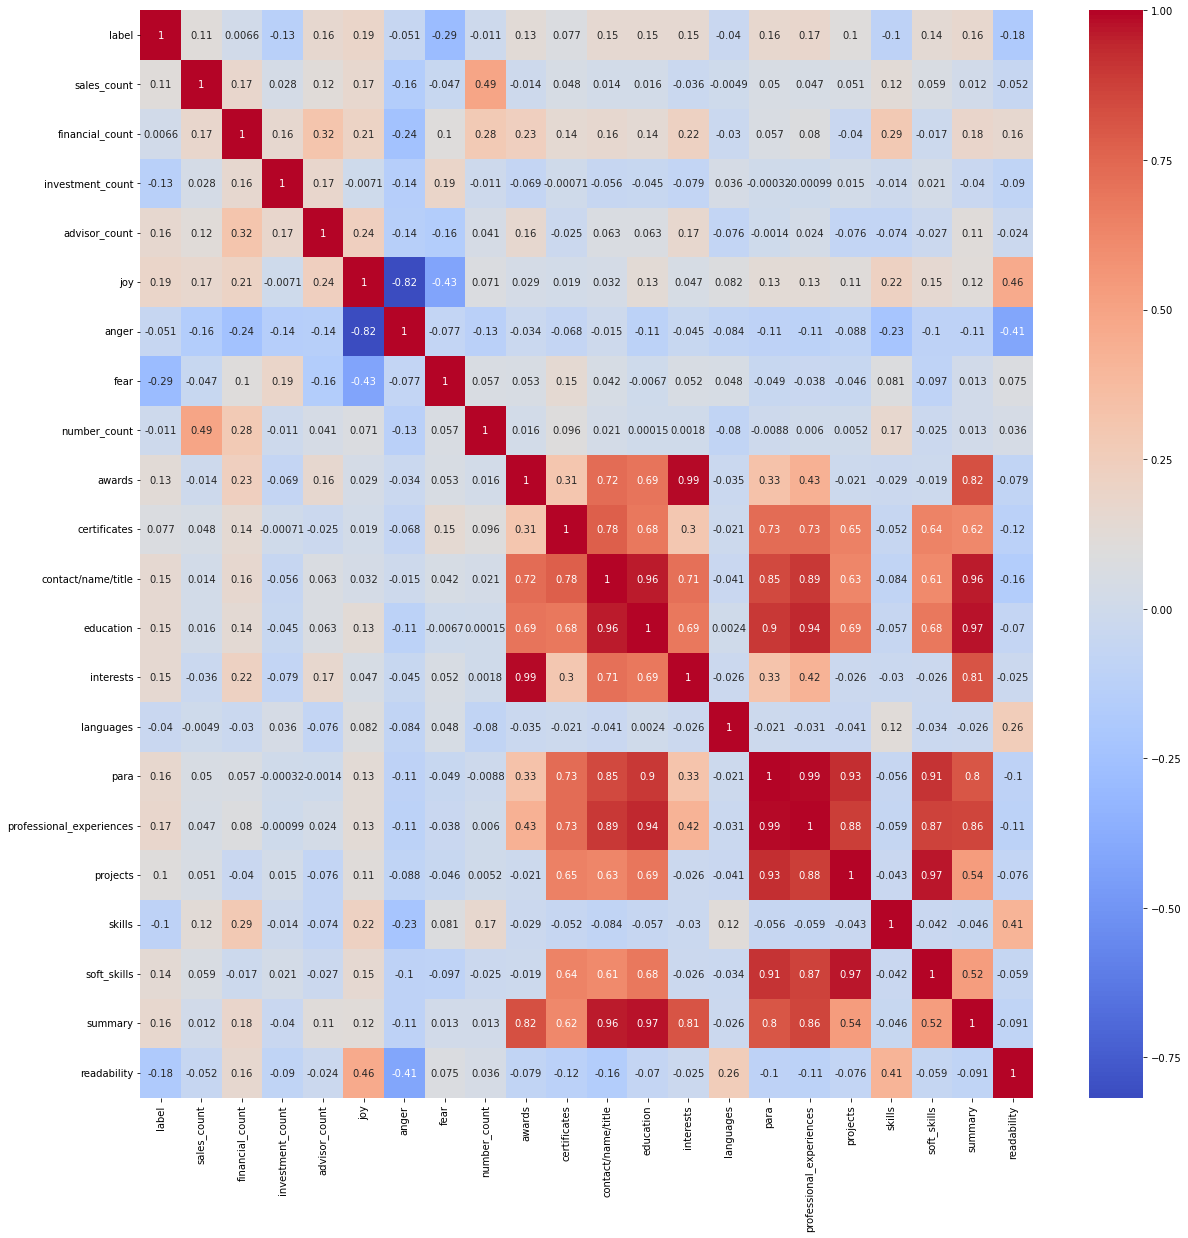

In [77]:
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True, cmap='coolwarm')